# Problem Statement

An automobile parts manufacturing company has collected data on transactions for 3 years. They do not have any in-house data science team, thus they have hired you as their consultant. Your job is to use your data science skills to find the underlying buying patterns of the customers, provide the company with suitable insights about their customers, and recommend customized marketing strategies for different segments of customers. 

## Importing Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

#For Data Wrangling/Data Processing
import numpy as np   
import pandas as pd    

#For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import matplotlib.style

## Reading and Loading the Excel file

In [3]:
df = pd.read_excel('C:\\Users\\ramas\\Great Learning\\MONTH 10 - MRA\\Sales_Data.xlsx')

In [5]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,43155,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,43227,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,43282,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,43337,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,43401,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


## Shape of the data

In [4]:
df.shape

(2747, 20)

## Info of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   int64  
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
ORDERDATE,2747.0,43598.914088,230.231295,43106.00,43412.000,43640.00,43786.000,43982.00
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [8]:
df.describe(include = 'object').T

,count,unique,top,freq
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
PRODUCTCODE,2747,109,S18_3232,51
CUSTOMERNAME,2747,89,Euro Shopping Channel,259
PHONE,2747,88,(91) 555 94 44,259
ADDRESSLINE1,2747,89,"C/ Moralzarzal, 86",259
CITY,2747,71,Madrid,304
POSTALCODE,2747,73,28034,259
COUNTRY,2747,19,USA,928
CONTACTLASTNAME,2747,76,Freyre,259


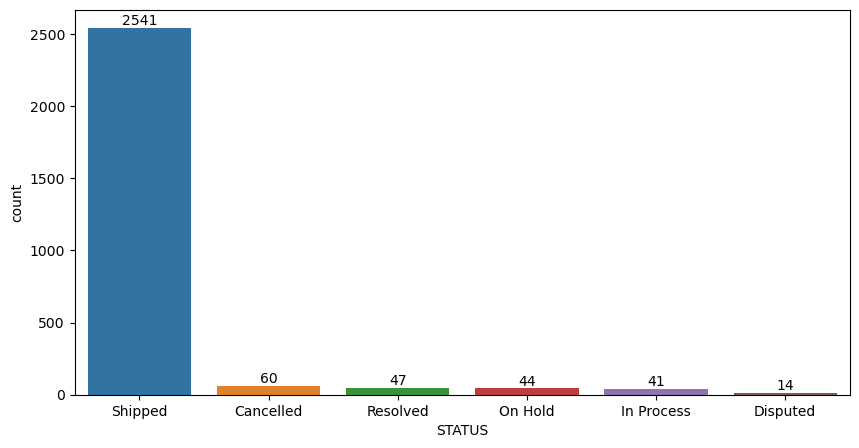

In [31]:
plt.figure(figsize=(10,5))
splot = sns.countplot(x = 'STATUS',
              data = df,
              order = df['STATUS'].value_counts().index)
plt.bar_label(splot.containers[0]);

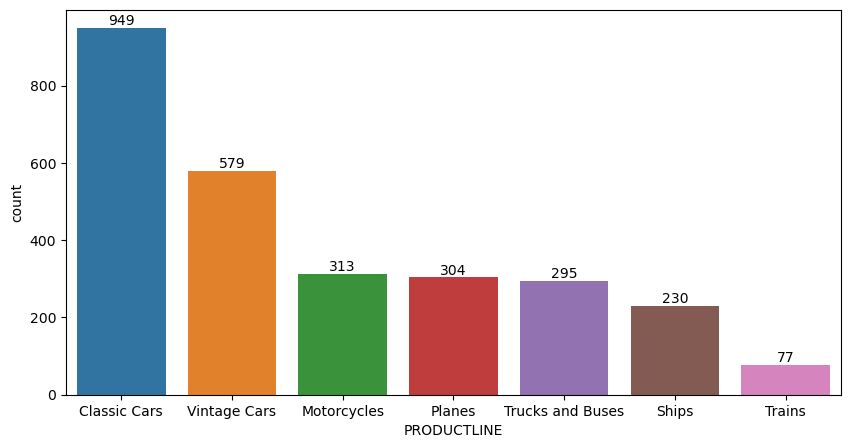

In [32]:
plt.figure(figsize=(10,5))
splot = sns.countplot(x = 'PRODUCTLINE',
              data = df,
              order = df['PRODUCTLINE'].value_counts().index)
plt.bar_label(splot.containers[0]);

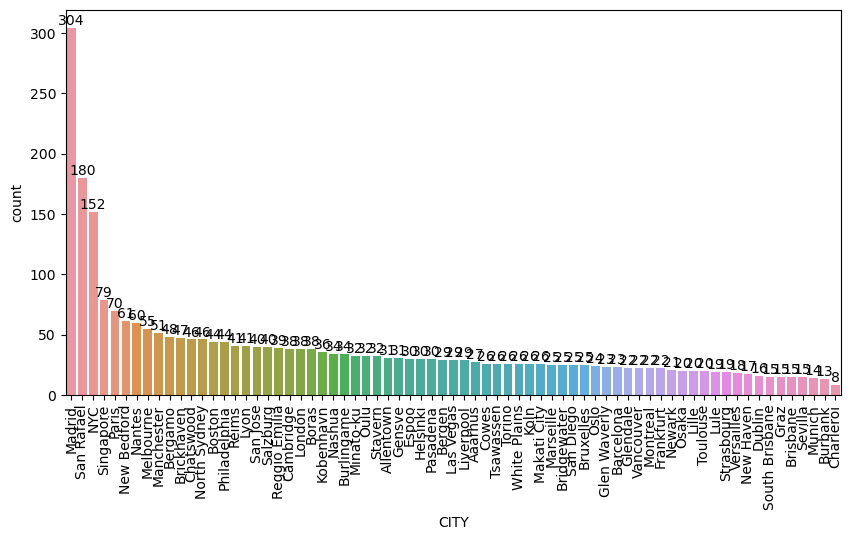

In [37]:
plt.figure(figsize=(10,5))
splot = sns.countplot(x = 'CITY',
              data = df,
              order = df['CITY'].value_counts().index)
plt.bar_label(splot.containers[0])
plt.xticks(rotation=90);

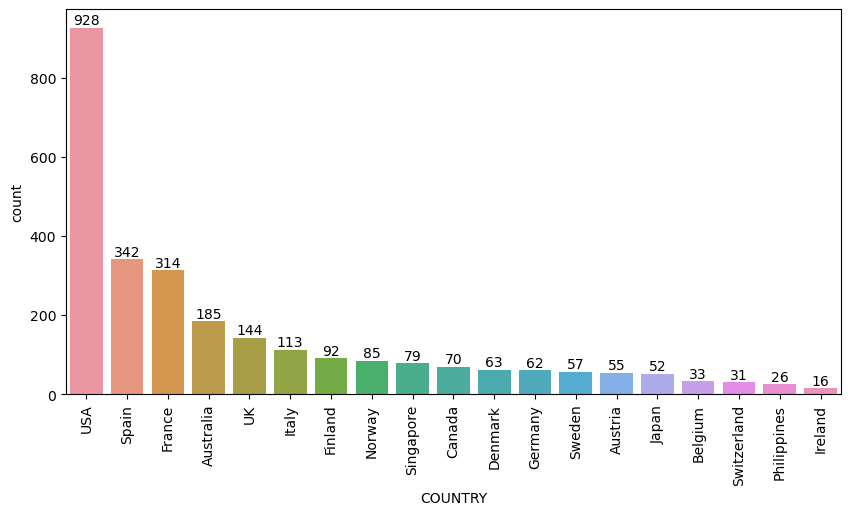

In [36]:
plt.figure(figsize=(10,5))
splot = sns.countplot(x = 'COUNTRY',
              data = df,
              order = df['COUNTRY'].value_counts().index)
plt.bar_label(splot.containers[0])
plt.xticks(rotation=90);

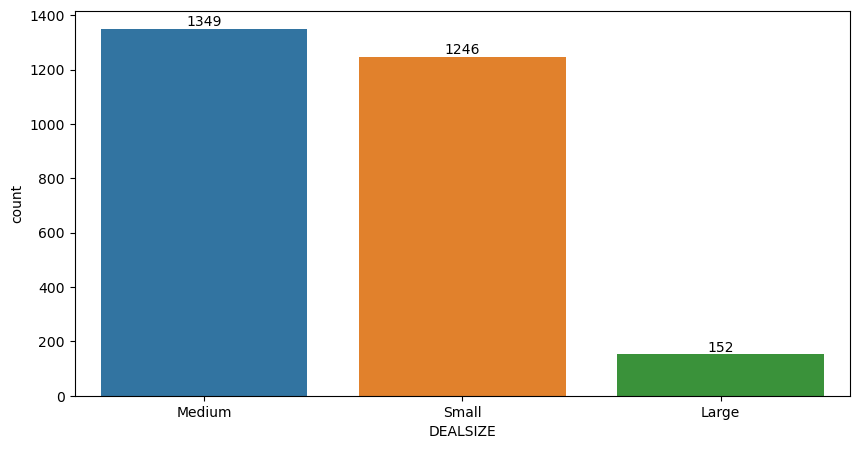

In [35]:
plt.figure(figsize=(10,5))
splot = sns.countplot(x = 'DEALSIZE',
              data = df,
              order = df['DEALSIZE'].value_counts().index)
plt.bar_label(splot.containers[0]);

<Axes: >

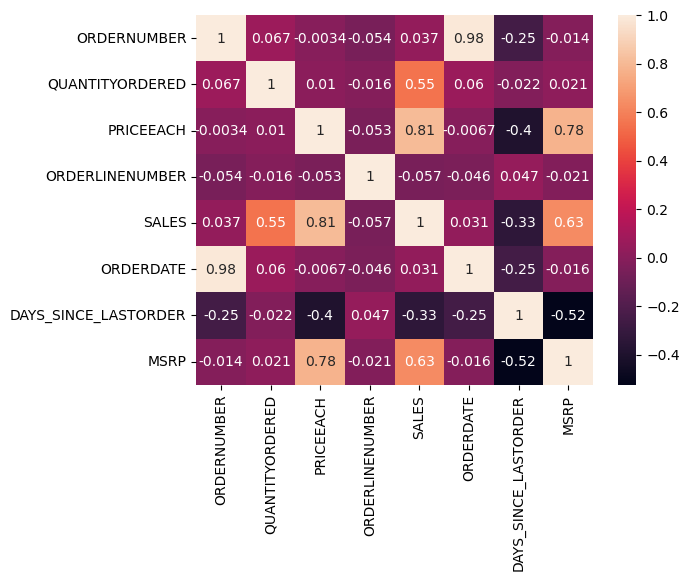

In [38]:
sns.heatmap(df.corr(), annot=True)

In [40]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64